### Student ID  : 2040973
### Student Name: Yogapriya Vankadari

# House Price Predicition :
### Prediction of house prices using linear and advanced regression models
   
#### Summary :
1. Data Loading
2. Data Cleaning
3. Data Exploration, statistical analysis & Visualization
4. Model building,Fitting and performance evaluation
5. Comparing results of different regressors
6. Shortcomings and Improvements
7. Conclusion
        

In [269]:
from sklearn.preprocessing import *
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest,GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.regressor import StackingCVRegressor,StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

# 1. Data Loading

In [39]:
df = pd.read_csv('House_Price_Dataset.csv',)

In [40]:
df

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [41]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   Seller         34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Rooms2         26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Latitude       26881 non-null  float64
 18  Longit

In [43]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2            8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
RegionName           3
PropertyCount        3
dtype: int64

# 2. Data Cleaning

#### 7160 records have null value for "Price" feature. Since the main aim is to determine price, we can use this data to predict the price. But, cannot be used as test data as accuracy cannot be compared.

In [44]:
df_predict = df_train_test = df.copy()

#### Store the records with null values for price feature to predict

In [45]:
df_predict = df_predict[df_predict['Price'].isna()]

In [46]:
df_predict.shape

(7610, 21)

#### Drop the records with null values for "Price" to use the data set for Train and Test

In [47]:
df_train_test.dropna(axis=0, subset=['Price'], inplace = True)

In [48]:
df_train_test.shape

(27247, 21)

In [49]:
df_train_test.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2            6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Latitude          6254
Longitude         6254
RegionName           3
PropertyCount        3
dtype: int64

#### Since the data set df_train_test has 0 null values for "Price". This will be ideal data set for Training and Testing. Although other features have null values and must undergo data cleaning process

#### Pre-processing of data for Distance and Postcode

In [50]:
df_train_test[df_train_test['Distance'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,06/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_train_test[df_train_test['Postcode'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,06/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Since these rows have multiple columns with Null Values, it can be dropped to clean up the data

In [52]:
df_train_test.dropna(axis=0, subset=['Postcode'], inplace = True)
df_train_test.dropna(axis=0, subset=['Distance'], inplace = True)

In [53]:
df_train_test.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2            6440
Bathroom          6446
Car               6823
Landsize          9264
BuildingArea     16590
YearBuilt        15162
CouncilArea          2
Latitude          6253
Longitude         6253
RegionName           2
PropertyCount        2
dtype: int64

#### Since Rooms and Rooms2 are similar features, Copy the values of Rooms to Rooms2 where ever null value is present for feature "Rooms2"

In [54]:
df_train_test['Rooms2'].fillna(df_train_test['Rooms'], inplace = True)

In [55]:
df_train_test.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2               0
Bathroom          6446
Car               6823
Landsize          9264
BuildingArea     16590
YearBuilt        15162
CouncilArea          2
Latitude          6253
Longitude         6253
RegionName           2
PropertyCount        2
dtype: int64

#### Replacing Null values for "Bathroom" and "Car" features with most repeated(mode) value for those columns

In [56]:
df_train_test['Bathroom'].fillna(df_train_test.mode()['Bathroom'][0], inplace = True)
df_train_test['Car'].fillna(df_train_test.mode()['Car'][0], inplace = True)

In [57]:
df_train_test.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2               0
Bathroom             0
Car                  0
Landsize          9264
BuildingArea     16590
YearBuilt        15162
CouncilArea          2
Latitude          6253
Longitude         6253
RegionName           2
PropertyCount        2
dtype: int64

#### Replacing average value(mean) for null valued columns for features "Landsize" , "Building area" and "Year Built"

In [58]:
df_train_test['Landsize'].fillna(df_train_test['Landsize'].mean(), inplace = True)
df_train_test['BuildingArea'].fillna(df_train_test['BuildingArea'].mean(), inplace = True)
df_train_test['YearBuilt'].fillna(df_train_test['YearBuilt'].mean(), inplace = True)

In [59]:
df_train_test.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Rooms2              0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         2
Latitude         6253
Longitude        6253
RegionName          2
PropertyCount       2
dtype: int64

#### Council area, Region Name and Property count have two rows each with null values and can be dropped.

In [60]:
df_train_test.dropna(axis=0, subset=['CouncilArea'], inplace = True)
df_train_test.dropna(axis=0, subset=['RegionName'], inplace = True)
df_train_test.dropna(axis=0, subset=['PropertyCount'], inplace = True)

In [61]:
df_train_test.shape

(27244, 21)

In [62]:
df_train_test.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Rooms2              0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Latitude         6251
Longitude        6251
RegionName          0
PropertyCount       0
dtype: int64

#### Latitude and Longitude values are not used in designing the model and hence can be filled with '0'. The  data is now free from Nan values.

In [63]:
df_train_test['Latitude'].fillna(0.0, inplace = True)
df_train_test['Longitude'].fillna(0.0, inplace = True)

In [64]:
df_train_test.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Seller           0
Date             0
Distance         0
Postcode         0
Rooms2           0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longitude        0
RegionName       0
PropertyCount    0
dtype: int64

#### Next step is to remove Outliers : 

#### The histogram below shows the distribution of target variable price

In [65]:
bin_values = np.arange(start=df_train_test['Price'].min(), stop=df_train_test['Price'].max(), step=100000)

Text(0.5, 0, 'Price')

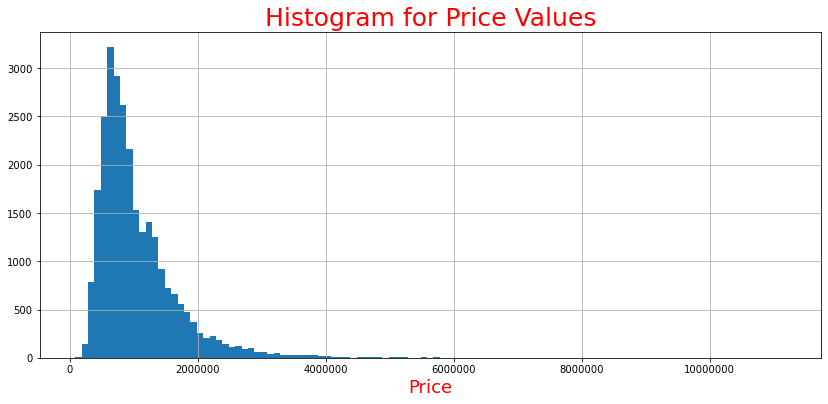

In [66]:
df_train_test['Price'].hist(bins=bin_values, figsize=[14,6])
plt.ticklabel_format(style = 'plain')
plt.title('Histogram for Price Values', color='red',fontsize=25)
plt.xlabel('Price',color='red',fontsize=18)


#### The above histogram is right skewed and the values > 2000000 are outliers. The below is the boxplot representation of target variable Price.

<AxesSubplot:xlabel='Price'>

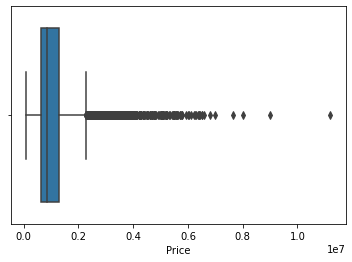

In [67]:
import seaborn as sns
sns.boxplot(x=df_train_test['Price'])

#### A better approach would be to remove the outliers as a part of data cleaning process. This results in a better model design. 

#### Calculating Zscore to find deviations from ideal model

In [68]:
z = np.abs(stats.zscore(df_train_test['Price']))
print(z)

[0.66999691 0.02371083 0.64661351 ... 0.53814578 0.13997302 0.04709423]


#### Calculating 1st and 3rd Quartile values for Price feature

In [69]:
Q1 = df_train_test['Price'].quantile(0.25)
Q3 = df_train_test['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

660000.0


In [70]:
print((df_train_test['Price'] < (Q1 - 1.5 * IQR)) |(df_train_test['Price'] > (Q3 + 1.5 * IQR)))

1        False
2        False
4        False
5        False
6        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Name: Price, Length: 27244, dtype: bool


#### Remove the outliers

In [71]:
df_train_test = df_train_test[(df_train_test['Price'] < (Q1 - 1.5 * IQR)) |(df_train_test['Price'] > (Q3 + 1.5 * IQR)) == False]

In [72]:
df_train_test

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.000000,156.834586,1966.609153,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.000000,79.000000,1900.000000,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.000000,150.000000,1900.000000,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,04/03/2017,2.5,3067.0,...,2.0,1.0,94.000000,156.834586,1966.609153,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04/06/2016,2.5,3067.0,...,1.0,2.0,120.000000,142.000000,2014.000000,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.000000,156.834586,1966.609153,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.000000,104.000000,2018.000000,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.000000,120.000000,2000.000000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.0,2.0,593.488933,156.834586,1966.609153,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0


#### Display the Histogram after removing the outliers

Text(0.5, 0, 'Price')

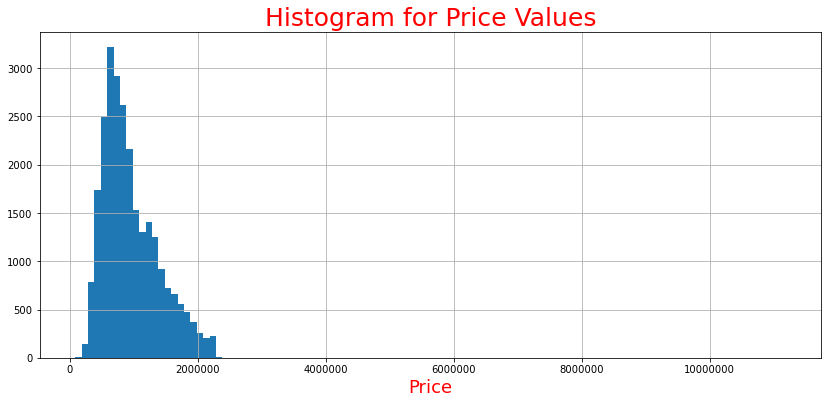

In [73]:
df_train_test['Price'].hist(bins=bin_values, figsize=[14,6])
plt.ticklabel_format(style = 'plain')
plt.title('Histogram for Price Values', color='red',fontsize=25)
plt.xlabel('Price',color='red',fontsize=18)

# 3. Data Exploration, Statistical analysis & Visualization

#### Using pairplots to define the relationship between target variable "Price" and all other columns

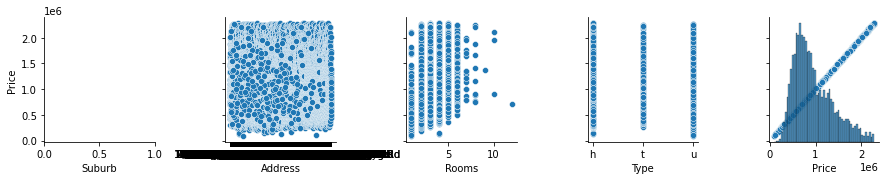

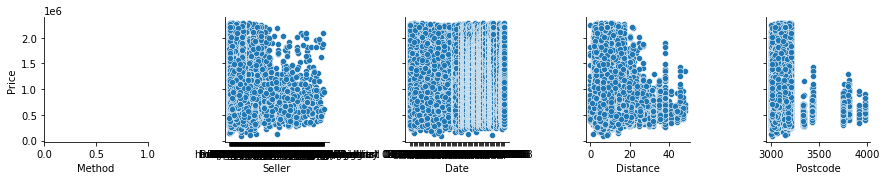

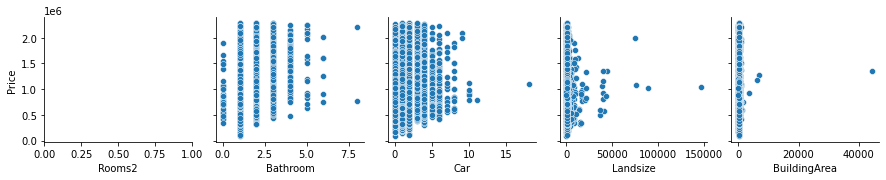

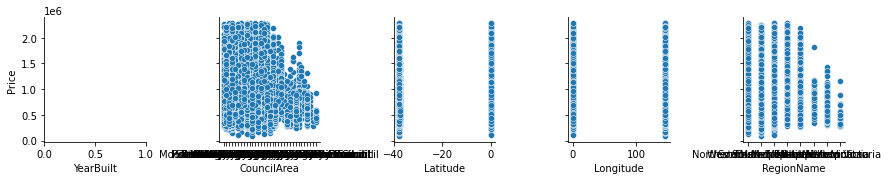

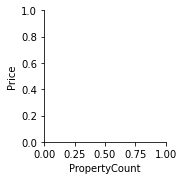

In [74]:
for i in range(0, len(df_train_test.columns), 5):
    sns.pairplot(data=df_train_test,
                x_vars=df_train_test.columns[i:i+5],
                y_vars=['Price'])

#### From the above result, it is evident that the features rooms, method, car, bathroom, building area, landsize and distance influence the target feature "Price" to some extent if not completely.

####  Plotting a heatmap to find out the dependency of these variables with respect to each other

#### Determining the correlation between different features of the dataset

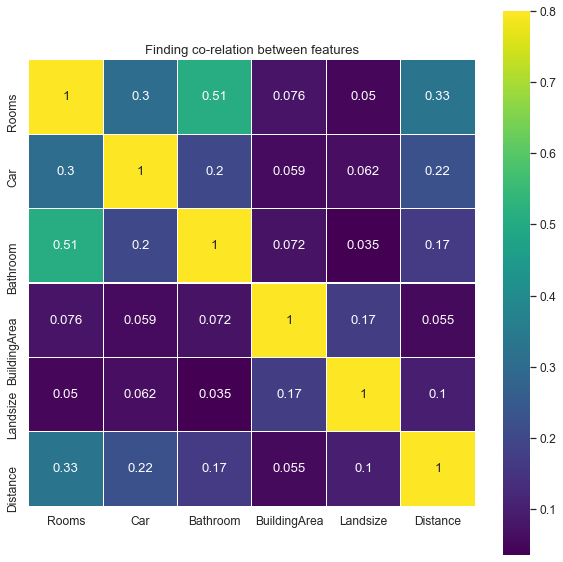

In [101]:
corrMatrix=df_train_test[['Rooms', 'Method','Car','Bathroom','BuildingArea','Landsize','Distance']].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Finding co-relation between features');

#### From the above result, we understand that most of the features are not dependent on each other with correlation value less than 0.5. But the features Rooms and Bathrooms are dependent on each other will correlation value 0.51

#### Plotting a relationplot to find the dependency of feature Bathroom against feature rooms

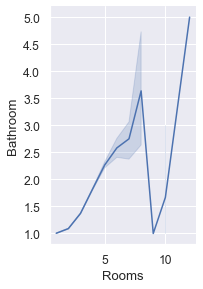

In [102]:
sns.relplot(data=df_train_test, x="Rooms", y="Bathroom",kind="line", height=4, aspect=.7)    

#### From the above result, it is understood that the feature Bathroom is lineraly dependent on the feature Rooms to some extent. A small change in value of feature Room greatly influences the feature Bathroom and hence must be removed.

# 4. Model building,Fitting and performance evaluation

## Building a Model

#### From the previous exploration techniques, the final list of features that influence the target feature "Price" are "Rooms, Car, BuildingArea,Landsize and Distance". Also, features Method and YearBuilt influence the model to certain extent and is included.

#### X axis for the model is framed by the independent variables listed above

In [271]:
x = df_train_test[[col for col in df_train_test.columns if col in ['Rooms', 'BuildingArea','Car','Landsize','Distance','Method','YearBuilt']]]

In [272]:
x

,Rooms,Method,Distance,Car,Landsize,BuildingArea,YearBuilt
1,2,S,2.5,1.0,202.000000,156.834586,1966.609153
2,2,S,2.5,0.0,156.000000,79.000000,1900.000000
4,3,SP,2.5,0.0,134.000000,150.000000,1900.000000
5,3,PI,2.5,1.0,94.000000,156.834586,1966.609153
6,4,VB,2.5,2.0,120.000000,142.000000,2014.000000
...,...,...,...,...,...,...,...
34852,4,PI,6.3,3.0,593.000000,156.834586,1966.609153
34853,2,SP,6.3,1.0,98.000000,104.000000,2018.000000
34854,2,S,6.3,2.0,220.000000,120.000000,2000.000000
34855,3,SP,6.3,2.0,593.488933,156.834586,1966.609153


#### Converting the categorical values into dummy / indicator variables. The Categorical feature "Method" is split into multiple columns

In [273]:
x = pd.get_dummies(x)

In [274]:
x

,Rooms,Distance,Car,Landsize,BuildingArea,YearBuilt,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1,2,2.5,1.0,202.000000,156.834586,1966.609153,0,1,0,0,0
2,2,2.5,0.0,156.000000,79.000000,1900.000000,0,1,0,0,0
4,3,2.5,0.0,134.000000,150.000000,1900.000000,0,0,0,1,0
5,3,2.5,1.0,94.000000,156.834586,1966.609153,1,0,0,0,0
6,4,2.5,2.0,120.000000,142.000000,2014.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6.3,3.0,593.000000,156.834586,1966.609153,1,0,0,0,0
34853,2,6.3,1.0,98.000000,104.000000,2018.000000,0,0,0,1,0
34854,2,6.3,2.0,220.000000,120.000000,2000.000000,0,1,0,0,0
34855,3,6.3,2.0,593.488933,156.834586,1966.609153,0,0,0,1,0


#### Y axis of the model is defined by the target variable "Price"

In [275]:
y=df_train_test['Price']

In [276]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 25966, dtype: float64

#### Splitting the data into train and test to Train the model

In [277]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,random_state=10)

## Model Fitting

#### Model fitting is the measure of how well a machine learning model generalizes data similar to that with which it was trained

## Linear Models

### ***********Using Linear Regression***************

#### Fit the data using train dataset

In [278]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

#### Accuracy of model for train dataset

In [279]:
lm.score(x_train,y_train)

0.38023110299455876

#### Accuracy of model using test dataset

In [280]:
lr = lm.score(x_test,y_test)
lr

0.4012894789334236

#### Evaluating Error using RMSE

In [282]:
rmlm = metrics.mean_squared_error(y_test,lm.predict(x_test))
rmlm

113039890095.97493

#### Visualizing predicted y against provided y

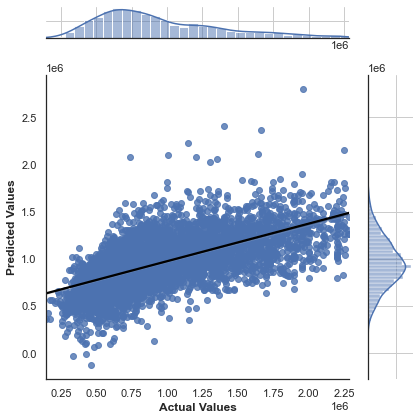

In [283]:
predicted_y = lm.predict(x_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}})
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()


### ****** Using ElasticNet Linear Model ******

#### Fit the data using train dataset

In [284]:
_grid = {"alphas" : np.arange(0.0001,0.001,0.00005),
         "l1_ratio" : [.1, .5, .7, .9, .95, .96, .97,.98, .99, 1]}
_cv =ShuffleSplit(n_splits=30, test_size=400, random_state=0)
ENet = ElasticNetCV(cv =_cv,max_iter=1e5, **_grid)
ENet.fit(x_train,y_train)

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17966262437229.5, tolerance: 380752199094.673
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17967004363638.25, tolerance: 380752199094.673
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17967408225322.5, tolerance: 380752199094.673
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90410374203012.5, tolerance: 382390743695.94574
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90409765501344.75, tolerance: 382390743695.94574
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90409686546370.0, tolerance: 382390743695.94574
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWa

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18091370882723.25, tolerance: 382451142844.5717
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18091189776243.25, tolerance: 382451142844.5717
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90048242616082.0, tolerance: 382451142844.5717
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarn

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89572441776353.75, tolerance: 381180609706.97925
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89571913086585.25, tolerance: 381180609706.97925
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89572507814486.0, tolerance: 381180609706.97925
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceW

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90600617885881.25, tolerance: 382272699674.35284
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90600281293222.75, tolerance: 382272699674.35284
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90600239450620.75, tolerance: 382272699674.35284
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Convergence

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90627950403260.5, tolerance: 382251922450.20807
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90627600750033.25, tolerance: 382251922450.20807
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90628843940247.75, tolerance: 382251922450.20807
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceW

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90398232749389.25, tolerance: 381955399102.36237
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90398059328718.0, tolerance: 381955399102.36237
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90398430598643.0, tolerance: 381955399102.36237
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWa

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90357580491973.75, tolerance: 382938318830.93933
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90354815095138.5, tolerance: 382938318830.93933
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18061735160902.0, tolerance: 381837055711.3068
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWar

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89739863176381.0, tolerance: 381158919675.3455
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89740037838258.75, tolerance: 381158919675.3455
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89740191365853.0, tolerance: 381158919675.3455
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarni

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18035747415142.0, tolerance: 381193672040.7202
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18036501029182.0, tolerance: 381193672040.7202
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18036871815479.75, tolerance: 381193672040.7202
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarni

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90342346160611.75, tolerance: 382159805745.05994
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90342393956939.0, tolerance: 382159805745.05994
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90342588388917.5, tolerance: 382159805745.05994
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWa

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18036680389754.25, tolerance: 382240740014.9415
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89799850621119.0, tolerance: 382240740014.9415
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89799794197925.0, tolerance: 382240740014.9415
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarni

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90517403460016.0, tolerance: 382098235783.6808
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90517936454950.25, tolerance: 382098235783.6808
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90519062757571.25, tolerance: 382098235783.6808
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarn

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17955050930914.25, tolerance: 381879987108.2129
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17954991365276.5, tolerance: 381879987108.2129
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17955039636050.5, tolerance: 381879987108.2129
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarni

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90037305025463.75, tolerance: 382120449514.43884
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90037782215455.5, tolerance: 382120449514.43884
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90037660063625.75, tolerance: 382120449514.43884
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceW

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90933439585397.75, tolerance: 382869772298.2651
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90933342333143.25, tolerance: 382869772298.2651
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90933478433038.0, tolerance: 382869772298.2651
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarn

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90064531546709.25, tolerance: 382397507134.41205
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90060399520561.25, tolerance: 382397507134.41205
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17956770895421.0, tolerance: 381742734202.16254
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceW

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89773550042911.75, tolerance: 381646089870.0933
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89773459394092.0, tolerance: 381646089870.0933
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89772701382945.0, tolerance: 381646089870.0933
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarni

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18170851344096.25, tolerance: 382301064338.7977
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18171595451107.0, tolerance: 382301064338.7977
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18171613306822.5, tolerance: 382301064338.7977
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarni

Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90020252513942.25, tolerance: 382799813990.1878
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90018651369478.25, tolerance: 382799813990.1878
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90018747457933.0, tolerance: 382799813990.1878
  model = cd_fast.enet_coordinate_descent_gram(
Y:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarn

ElasticNetCV(alphas=array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095]),
             cv=ShuffleSplit(n_splits=30, random_state=0, test_size=400, train_size=None),
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1],
             max_iter=100000.0)

#### Accuracy of model for train dataset

In [285]:
ENet.score(x_train,y_train)

0.38023110299455865

#### Accuracy of model for test dataset

In [286]:
en = ENet.score(x_test,y_test)
en

0.40128947895221745

#### RMSE for ElasticNet

In [287]:
rmen = metrics.mean_squared_error(y_test,ENet.predict(x_test))
rmen

113039890092.42654

#### Visualizing predicted y against provided y

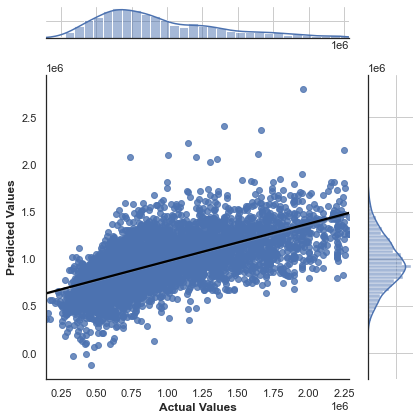

In [288]:
predicted_y = ENet.predict(x_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}})
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

# Advanced Regression Models

### ****** Using Gradient Boosting *******

#### Fit the data using train dataset

In [289]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

#### Accuracy of model for train dataset

In [290]:
model.score(x_train,y_train)

0.5644885507573825

#### Accuracy of model for test dataset

In [291]:
gb = model.score(x_test,y_test)
gb

0.5617532783726575

#### Evaluating Error using RMSE

In [292]:
rmgb = metrics.mean_squared_error(y_test,model.predict(x_test))
rmgb

82743428592.87645

#### Visualizing predicted y against provided y

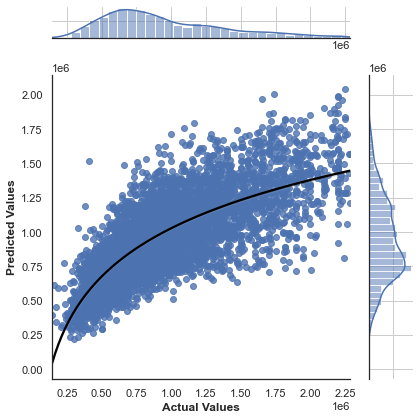

In [293]:
predicted_y = model.predict(x_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}},logx=True)
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

### ****** Using Random Forest ******

#### Fit the data using train dataset

In [294]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 50)
regressor.fit(x_train,y_train)  

RandomForestRegressor(random_state=50)

#### Accuracy of model for train dataset

In [295]:
regressor.score(x_train,y_train)

0.8903459561804705

#### Accuracy of model for test dataset

In [296]:
rf = regressor.score(x_test,y_test)
rf

0.6478201804883503

#### Evaluating Error using RMSE

In [297]:
rmrf = metrics.mean_squared_error(y_test,regressor.predict(x_test))
rmrf

66493516801.236015

#### Visualizing predicted y against provided y

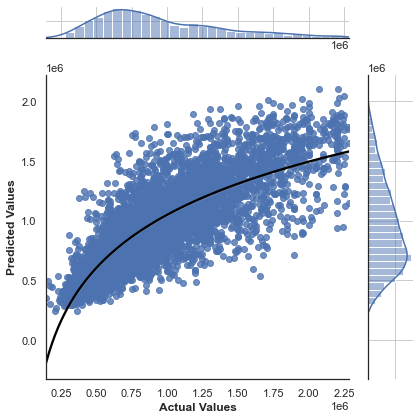

In [298]:
predicted_y = regressor.predict(x_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}},logx=True)
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

### ****** Using XGBoost ******

#### Fit the data using train dataset

In [299]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Accuracy of model for train dataset

In [300]:
xgb.score(x_train,y_train)

Y:\Softwares\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7680566279325987

#### Accuracy of model for test dataset

In [301]:
xg = xgb.score(x_test,y_test)
xg

Y:\Softwares\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.6692193898036236

#### Evaluating Error using RMSE

In [302]:
rmxg = metrics.mean_squared_error(y_test,xgb.predict(x_test))
rmxg

Y:\Softwares\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


62453226570.77543

#### Visualizing predicted y against provided y

Y:\Softwares\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


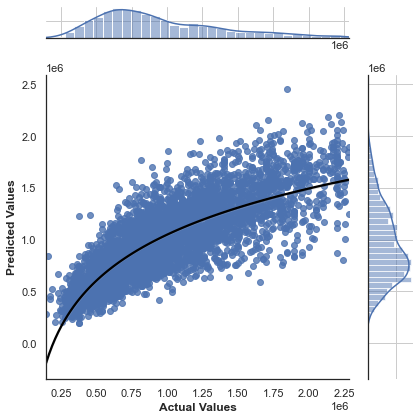

In [303]:
predicted_y = xgb.predict(x_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}},logx=True)
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

# 5. Comparing results of different regressors

In [304]:
Results = { 'Regressors': ['Linear Regression', 'ElasticNet', 'RandomForest', 'XGBRegressor', 'GradientBoosting'],
            'RMSE' : [rmlm,rmen,rmrf,rmxg,rmgb],
             'Accuracy' : [lr,en,rf,xg,gb],
          }

## Error Comparison using Barplot

Y:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


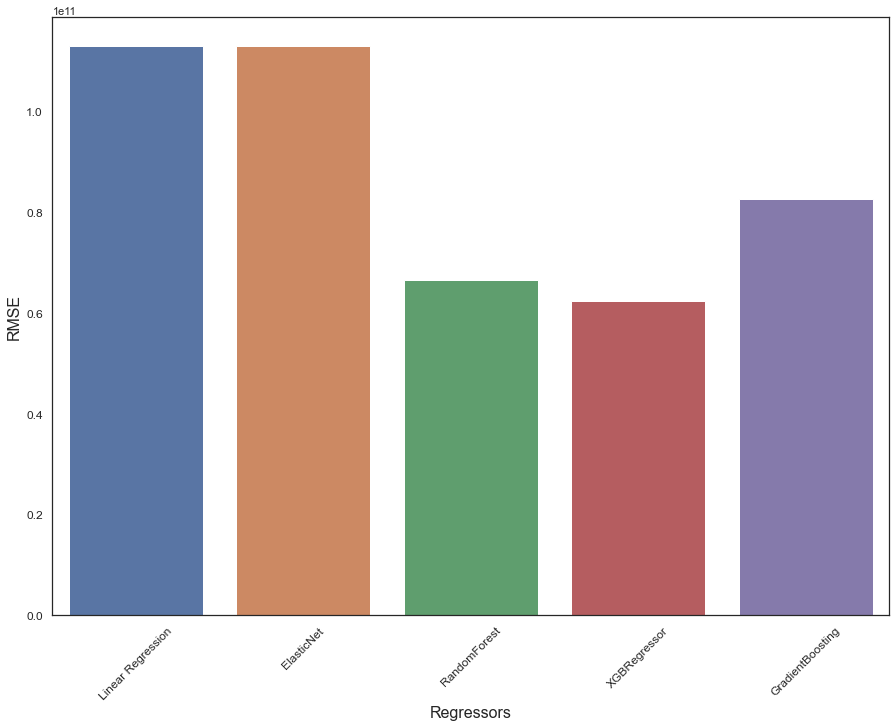

In [305]:
plt.figure(figsize=(15, 11))
sns.barplot(Results['Regressors'], Results['RMSE'])
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Accuracy Comparison using Barplot

Y:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


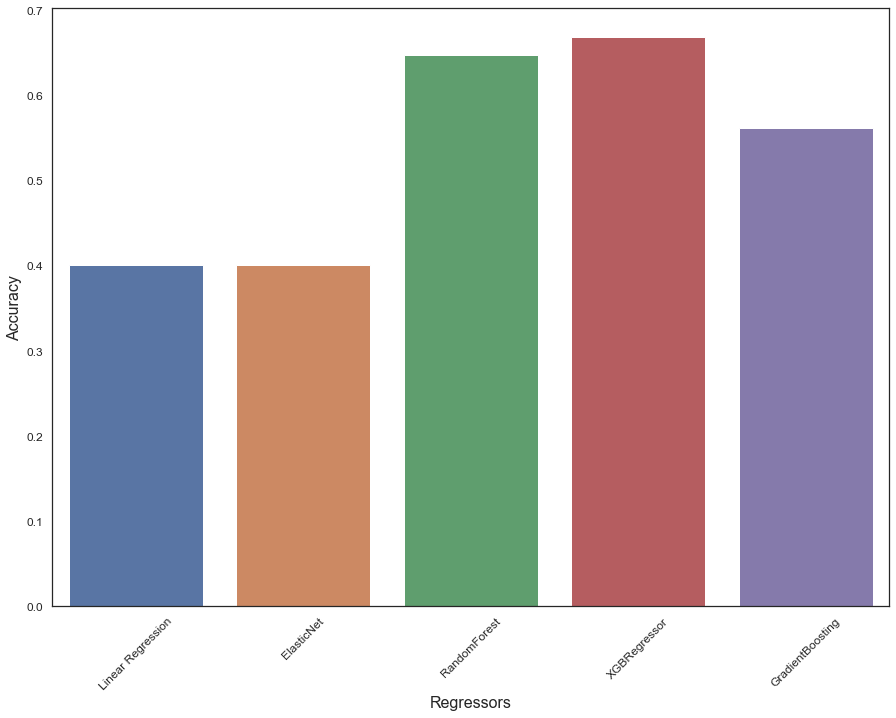

In [307]:
plt.figure(figsize=(15, 11))
sns.barplot(Results['Regressors'], Results['Accuracy'])
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 6. Shortcomings and Improvements

#### The train data is not accurately represented with train accuracy of maximum 76%. Ensemble techniques can be used to combine advanced regression models to improve training accuracy, thereby obtaining better test results

# 7. Conclusion

#### From the above two graphs, the regression algorithm - XGBRegressor performs better with less errors and high accuracy as compared to other algorithms for the considered dataset

#### The Linear regression algorithm performs the worst with 40.12% accuracy and XGBRegressor performs the best with 66.92% accuracy